# Non-linear regression

Despite the fact that both of our examples so far have involved **linear** data, we have already made use of the `curve_fit` function, which is capable of fitting **non-linear** data: let's have a look at a **non-linear** example:

In [4]:
%config InlineBackend.figure_format='retina'

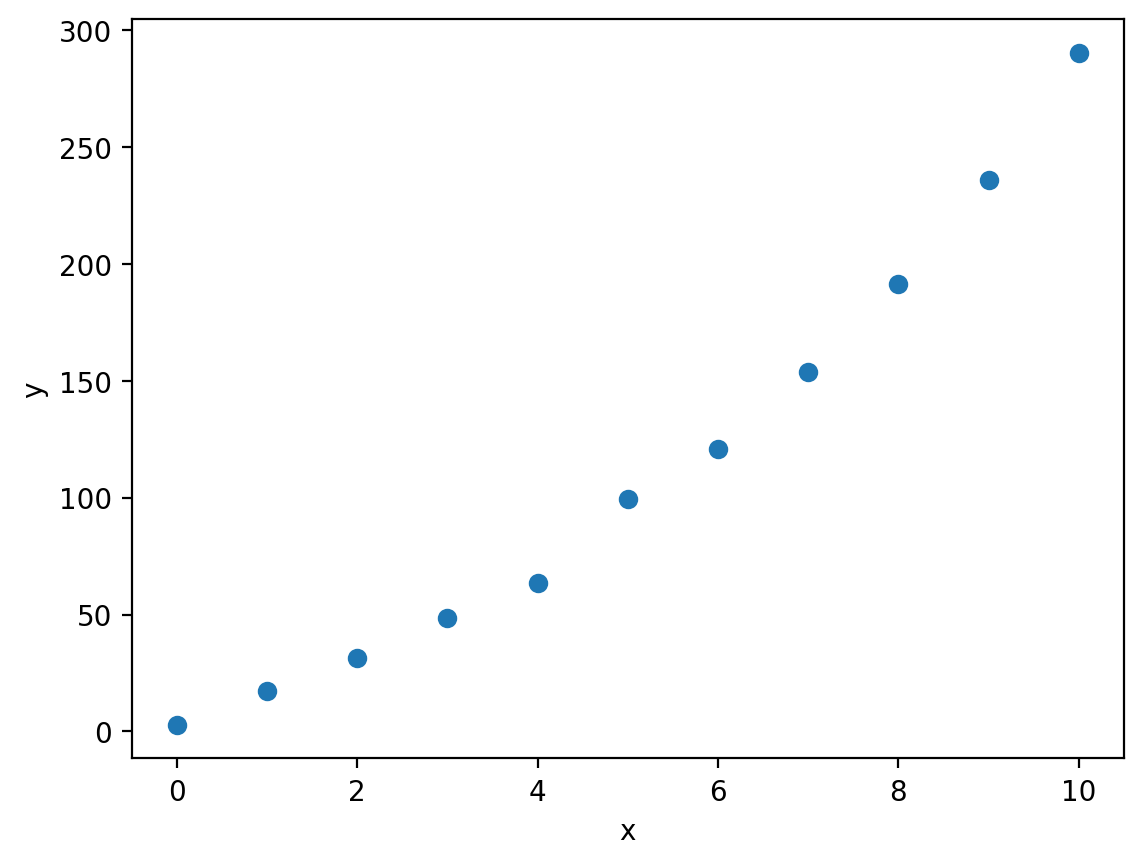

In [23]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 11)
y = 2.21 * x ** 2 + 5.40 * x + 12.1 + np.random.normal(scale=4, size=len(x))

plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Here we have some data which looks to be **quadratic**, so let's try to fit an quadratic **model** using `curve_fit`. First we need to define a **function** that represents the model we would like to fit. If we are trying to fit an quadratic curve, then mathematically we can define this as:

$$y = ax^{2} + bx + c$$

Let's write a function to Python-ise this:

In [24]:
def quadratic(x, a, b, c):
    """
    Calculate y = ax^2 + bx + c (a quadratic equation).

    Args:
        x (np.ndarray): A numpy array containing the x-values.
        a (float): The x^2 coefficient.
        b (float): The x coefficient.
        c (float): The additive constant.

    Returns:
        (np.ndarray): The y-values.
    """

    return a * x ** 2 + b * x + c

Now we can use `curve_fit` just like we did for the linear examples:

In [25]:
from scipy.optimize import curve_fit

optimised_parameters, covariance_matrix = curve_fit(quadratic, x, y)

By extracting the optimised values of $a$, $b$ and $c$ from `optimised_parameters` (notice that here we have used **multiple assignment** to separate the optimised parameters from the covariance matrix without having to use list slicing), we can plot our fitted quadratic against the experimental data:

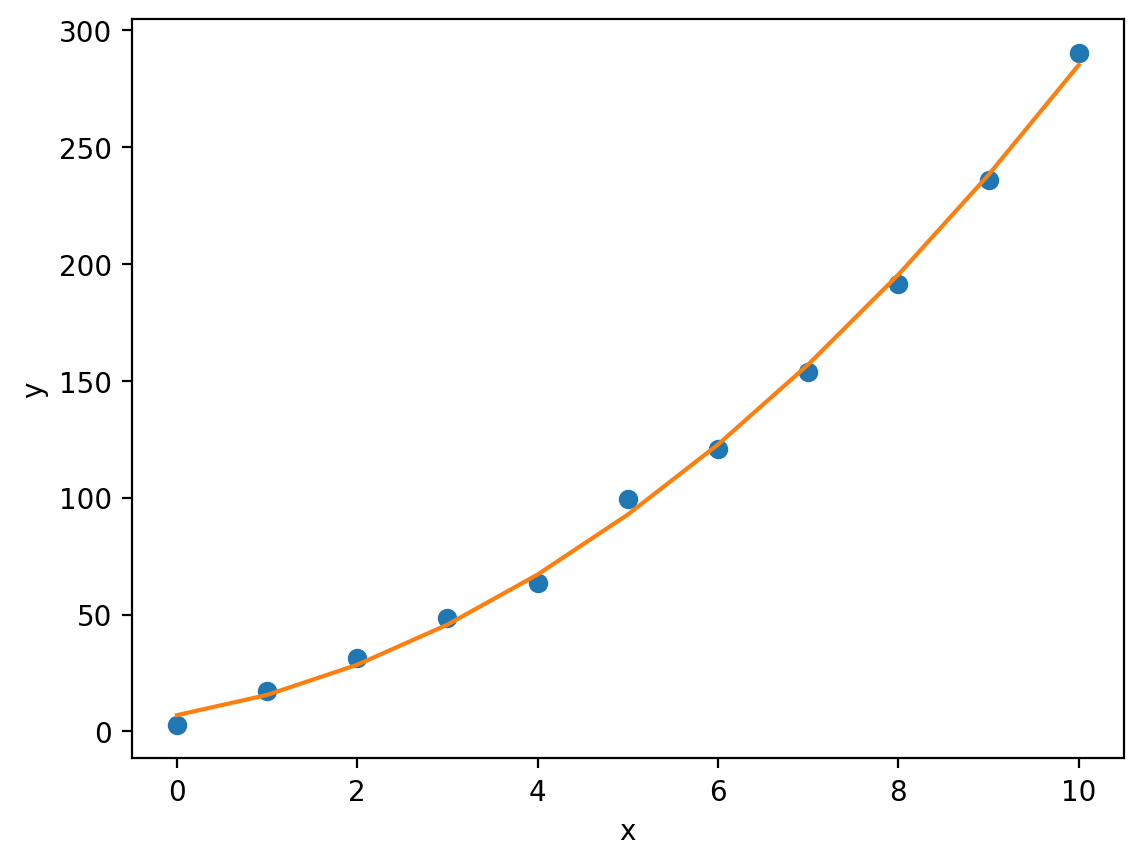

In [27]:
a, b, c = optimised_parameters
y_model = quadratic(x, a, b, c)

plt.plot(x, y, 'o', label='Experimental data')
plt.plot(x, y_model, label='Quadratic model')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Again we can the uncertainties in our model parameters (this time without taking into account experimental uncertainties) by looking at the diagonal of the covariance matrix:

In [29]:
a_error = covariance_matrix[0, 0]
b_error = covariance_matrix[1, 1]
c_error = covariance_matrix[2, 2]

print(f'a = {a} +/- {a_error}')
print(f'a = {b} +/- {b_error}')
print(f'a = {c} +/- {c_error}')

a = 2.1298853601358636 +/- 0.022787872593366898
a = 6.523467405636547 +/- 2.4565325394160755
a = 6.957476170749235 +/- 11.34835905873691
